<img
src="http://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>

<p><font size="5"> Cursus Recherche : Module Analogie </font></p>
<p><font size="5"> Representation Learning </font></p>
</br>
<p><font size="4"> [<span style="color:blue">Institut Mines Télécom</span>](https://www.mines-telecom.fr/en/)</p>

</CENTER>

----------------------------

Objectifs :
- Implémenter le pipeline : PCA + kmeans 
Varier le nombre de composantes 
tests sur Digits 

--> Notebook "propre", annoté et commenté pour le Mardi 14 Novembre. 

Méthodes : 

Deux domaines , trois datasets : 
 - Digits 
 - Olivetti Faces 
 - Haxby (données fMRI) 

Deux méthodes de Dimensionality Reduction 
Deux méthodes de Clustering 

Résultats : 

figures 


# <span style="color:##00B8DE"> Pipeline : from reduction to clustering</span>


**1)** With Digits


**2)** With Haxby

**3)** Comparaison avec le mode supervisé

Les courbes d'évaluation de performance de clustering pour PCA et ICA sont globalement croissantes en fonction du nombre de n_component, mais divergent assez rapidement (i.e. Elles perdent en régularité).
On s'aperçit aussi qu'en augmentant le nombre de clusters que le kmeans cherche, on a tendance à "lisser" les courbes de PCA/kmeans et d'ICA/kmeans.

**1)** With Digits

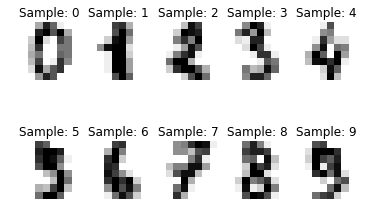

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Clustering performance evaluation for ICA/kmeans on Digits: 
0.670424990062

And for homogeneity score 
0.736782069062


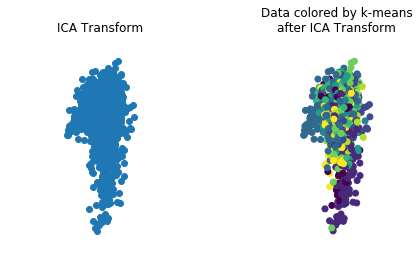

Clustering performance evaluation for PCA/Kmeans on Digits : 
0.665625321055

And for homogeneity score 
0.734638963571


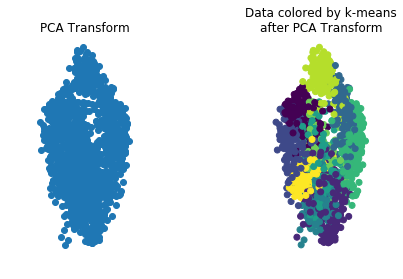

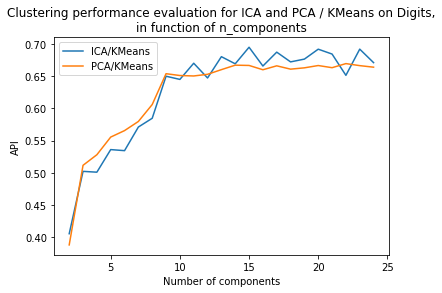

In [103]:
# We will Test PCA/ICA - KMeans on Digits

%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Sample: %i' % label)
plt.savefig('digits_dataset.png', bbox_inches = 'tight')
plt.show()

#PCA
def Digits_PCA_kmeans(n):
    pca = PCA(n_components=n, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    ImageDigitsPCA = pca.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data

    #ClusterisationPCA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsPCA)
    labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    return labelsPCA, ImageDigitsPCA


#ICA
def Digits_ICA_kmeans(n):
    ica = FastICA(n_components=n, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ImageDigitsICA = ica.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data
    
    #Clusterization ICA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',\
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsICA)
    labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    return labelsICA, ImageDigitsICA

###  Part PLOT  ###

n = 15

##Plot ICA

labelsICA, ImageDigitsICA = Digits_ICA_kmeans(n)

print("Clustering performance evaluation for ICA/kmeans on Digits: ")
print(metrics.adjusted_rand_score(digits.target, labelsICA)) 
print("\nAnd for homogeneity score ")
print(metrics.homogeneity_score(digits.target, labelsICA))

plt.figure()
plt.subplot(131)
plt.title("ICA Transform")
plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1])
plt.axis('off')
plt.subplot(133)
plt.title("Data colored by k-means\nafter ICA Transform")
plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1],c=labelsICA)
plt.axis('off')
plt.savefig('ICA_KMEANS_Clust.png', bbox_inches = 'tight')
plt.show()



N = 25
PerfICA = []
perfICA = 0
indX = [i for i in range(2,N)]
for m in range(2,N):
    labelsICA, ImageDigitsICA = Digits_ICA_kmeans(m)
    perfICA = metrics.adjusted_rand_score(digits.target, labelsICA)
    PerfICA.append(perfICA)


##Plot PCA

labelsPCA, ImageDigitsPCA = Digits_PCA_kmeans(n)

print("Clustering performance evaluation for PCA/Kmeans on Digits : ")
print(metrics.adjusted_rand_score(digits.target, labelsPCA))
print("\nAnd for homogeneity score ")
print(metrics.homogeneity_score(digits.target, labelsPCA))

plt.figure()
plt.subplot(131)
plt.title("PCA Transform")
plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1])
plt.axis('off')
plt.subplot(133)
plt.title("Data colored by k-means\nafter PCA Transform")
plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1],c=labelsPCA)
plt.axis('off')
plt.savefig('PCA_KMEANS_Clust.png', bbox_inches = 'tight')
plt.show()


Perfo = []
indx = [i for i in range(2,N)]
for m in range(2,N):
    labelsPCA, ImageDigitsPCA = Digits_PCA_kmeans(m)
    perf = metrics.adjusted_rand_score(digits.target,labelsPCA)
    Perfo.append(perf)

plt.figure()
plt.plot(indX, PerfICA, label="ICA/KMeans")
plt.plot(indx, Perfo, label="PCA/KMeans")
plt.title("Clustering performance evaluation for ICA and PCA / KMeans on Digits,\nin function of n_components")
plt.xlabel('Number of components')
plt.ylabel('API')
plt.legend()
plt.savefig('PCA_ICA_KMEANS_perf.png')
plt.show()

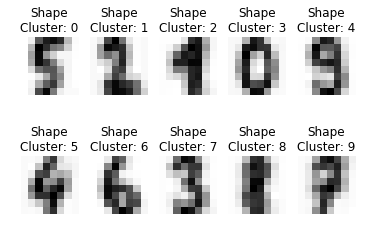

In [70]:
##### Shape of the KMeans centroids on Digits
def PCAKMeansTransfBack(pca, kmeans, numberDigits):
    cluster = pca.inverse_transform(kmeans.cluster_centers_[numberDigits])
    ImageDigitsPCABack = cluster.reshape(8,8)
    return ImageDigitsPCABack

pca = PCA(n_components=20, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
ImageDigitsPCA = pca.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',\
            verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsPCA) 

plt.figure()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(PCAKMeansTransfBack(pca, kmeans, i), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Shape\nCluster: %i' % i)
plt.savefig('digits_dataset_back.png', bbox_inches = 'tight')
plt.show()

La performance du clustering sur les Digits avec Pca/kmeans est croissante et plafonne à environ 66%, dès n_component = 14.
La performance du clustering sur les Digits avec Ica/kmeans est globalement croissante jusqu'à n_component = 20, où elle plafonne à 70%, et puis la méthode diverge !

**2)** With Haxby

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\nilearn\image\resampling.py:481: UserWarning: Casting data from int8 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


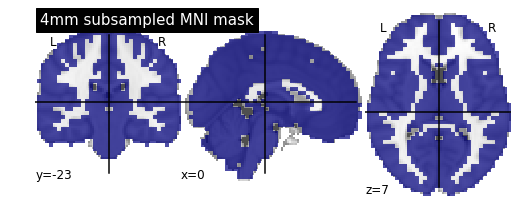

0.0050656637431


In [57]:
%matplotlib inline 

from nilearn.image import threshold_img
from nilearn.plotting import plot_roi
from nilearn.datasets import fetch_icbm152_brain_gm_mask
from nilearn.image import resample_img
from sklearn.model_selection import permutation_test_score
import numpy as np
from sklearn import metrics

# Preparing mni mask at 4x4x4 

from matplotlib import pyplot as plt 

X= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['X']
y= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['y']


mni_mask = fetch_icbm152_brain_gm_mask()

target_affine_4mm = np.diag([4,4,4])

mni_mask_resampled = resample_img(mni_mask, target_affine_4mm)

# Values need to be thresholded 

from nilearn.image import threshold_img

mni_mask_resampled_thre = threshold_img(mni_mask_resampled,threshold=0.5)

plot_roi(mni_mask_resampled_thre,title='4mm subsampled MNI mask')
plt.show()

# Mask #

from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map

mymasker = NiftiMasker(mask_img=mni_mask_resampled_thre)
mymasker.fit()

## BEST VALUES ##

from sklearn.feature_selection import SelectKBest

nbfeat = 2000 

featureselect = SelectKBest(k=nbfeat)

X_low = featureselect.fit_transform(X,y)

## Fit with non-supervised algorithm KMeans) ##

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#def PCAKmeansfMRI(n):
pca = PCA(n_components=20, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
statsPCA = pca.fit_transform(X_low)#This transformation is a compression of data

#Clusterization PCA - KMeans:
nbClust = 2
kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
   verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(statsPCA)
labels = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob

#########################################################################################################

print(metrics.homogeneity_score(labels_pred=labels, labels_true=y))

In [31]:
count1 = 0
count5 = 0
for yi in y :
    if yi == 1 :
        count1 +=1
    if yi == 5 :
        count5+=1
print(count1 ,count5)

192 49


In [92]:
import random
def occurences(nb, List):
    counter = 0
    for i in List :
        if i == nb :
            counter += 1
    return counter

def moreClean(listToClean,indX):
    return(listToClean[:indX]+listToClean[indX+1:])

def selectFeatures(listToClean):
    maxi = 49
    NbOfOne = occurences(1,listToClean)
    while NbOfOne > 49 :
        r = random.randint(0,len(listToClean)-1)
        if listToClean[r] == 1 :
            listToClean = moreClean(listToClean,r)
            NbOfOne -= 1
    return listToClean

def ArrayToList(A):
    line = len(A)
    L = []
    for i in range(line):
        L.append(A[i])
    return L

def reduceX(X):
    indXs = []
    maxi = 2*49
    L = X.shape
    for i in range(maxi):
        r = random.randint(0,L[0]-1)
        while r in indXs :
            r = random.randint(0,L[0]-1)
        indXs.append(r)
    reducedX = []
    for j in range(len(indXs)):
        reducedX.append(X[indXs[j]])
    reducedX_mat = np.array(reducedX)
    return reducedX_mat

In [86]:
print(y)
print(occurences(1,y))

[1 1 1 5 5 5 5 5 1 1 5 5 1 5 5 1 5 5 1 1 1 1 1 1 5 1 5 1 5 1 1 1 1 1 1 5 5
 1 5 5 1 5 1 5 1 5 1 5 5 5 1 5 1 1 1 1 5 5 1 1 1 1 1 5 5 5 1 5 1 5 1 1 5 5
 1 5 1 5 5 1 5 1 5 5 1 5 5 5 5 1 1 5 1 5 5 1 5 5]
49


C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\nilearn\image\resampling.py:481: UserWarning: Casting data from int8 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


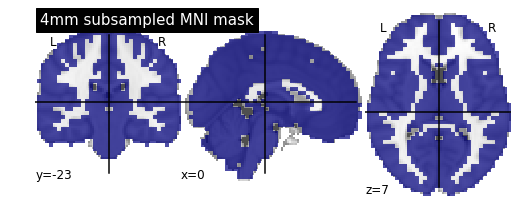

<class 'nibabel.nifti1.Nifti1Image'>
data shape (50, 59, 48, 1)
affine: 
[[   4.    0.    0.  -98.]
 [   0.    4.    0. -134.]
 [   0.    0.    4.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 4 50 59 48  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.  4.  4.  4.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : ali

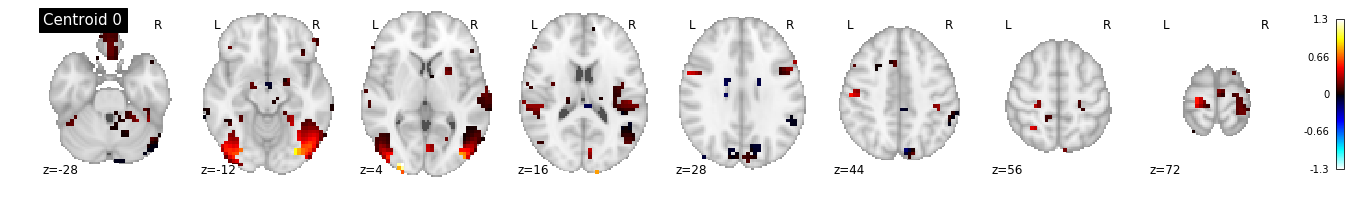

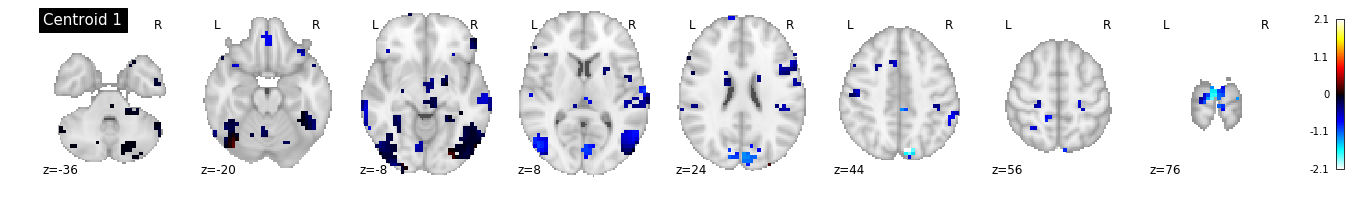

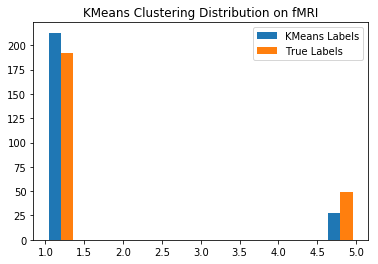

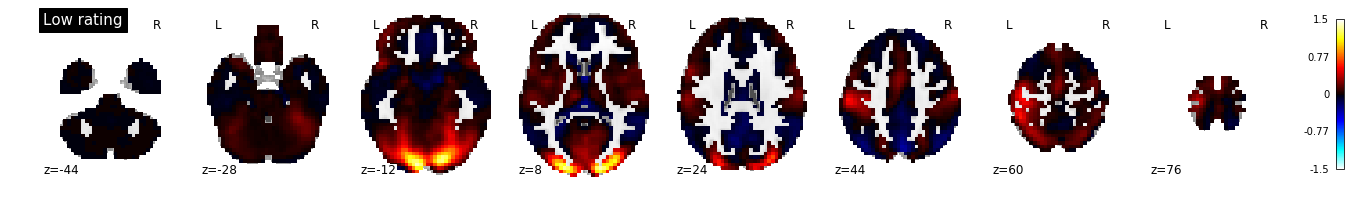

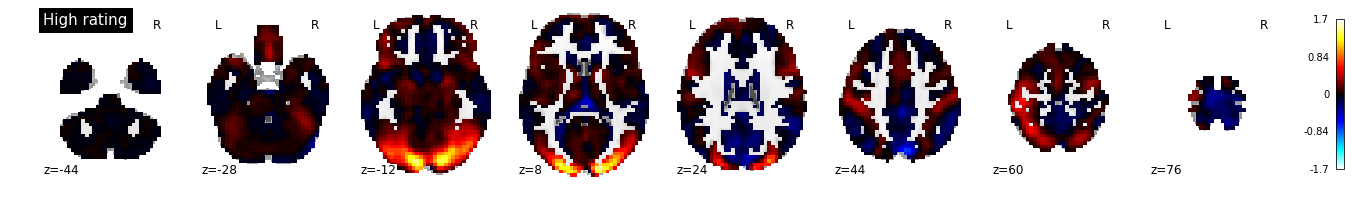

[1 1 1 1 1 1 1 1 1 1 5 1 5 1 5 5 5 1 1 1 1 1 1 1 1 1 5 5 1 1 1 1 5 5 1 1 1
 1 5 1 5 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 5 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 5 1 1 1 1 5 1 1 1 1 5 5 1 1 1 1 1 1 1 5 1 1 5 1 1 1 1 1
 5 1 1 1 1 1 5 5 1 5 1 1 1 1 5 1 1 1 1 1 5 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 5 5 5 1 1 1 1 1 1 1 5 1 5 1 1 1 1 1 1 1 5 1 5 1 1 5 1 1 1 1 1 1 1 1
 1 1 1 5 5 1 1 5 1 5 1 1 1 1 5 1 1 5 5 1 1 1 1 1 1 1 1 1 5 1 5 1 1 1 1 5 1
 1 1 1 5 5 1 1 1 1 1 1 1 1 5 1 1 1 1 5] [1 1 1 1 5 5 1 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 5 1 1 5 1 1 1
 1 5 1 1 5 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 1 1 1 1 1 5 1 1 1 1 1 1 1 1 5 1 1 1 1 5
 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 5 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 5 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 5 1 1 1 5 1 1 1 1 1 1 5 1 5 1 1 1 1 1]
0.0445267891265


In [99]:
## Test fMRI with balanced dataset 

%matplotlib inline 

from nilearn.image import threshold_img
from nilearn.plotting import plot_roi
from nilearn.datasets import fetch_icbm152_brain_gm_mask
from nilearn.image import resample_img
from sklearn.model_selection import permutation_test_score
import numpy as np
from sklearn import metrics

# Preparing mni mask at 4x4x4 

from matplotlib import pyplot as plt 

X= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['X']
y= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['y']

mni_mask = fetch_icbm152_brain_gm_mask()

target_affine_4mm = np.diag([4,4,4])

mni_mask_resampled = resample_img(mni_mask, target_affine_4mm)

# Values need to be thresholded 

from nilearn.image import threshold_img

mni_mask_resampled_thre = threshold_img(mni_mask_resampled,threshold=0.5)

plot_roi(mni_mask_resampled_thre,title='4mm subsampled MNI mask')
plt.show()

# Mask #

from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map

mymasker = NiftiMasker(mask_img=mni_mask_resampled_thre)
mymasker.fit()

## BEST VALUES ##

from sklearn.feature_selection import SelectKBest
nbfeat = 2000 
featureselect = SelectKBest(k=nbfeat)

X_low = featureselect.fit_transform(X,y)

## Fit with non-supervised algorithm KMeans) ##

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=20, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
statsPCA = pca.fit_transform(X_low)#This transformation is a compression of data

#Clusterization PCA - KMeans:
nbClust = 2
kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
   verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(statsPCA)
labels = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
plt.figure()
for i in range(nbClust):
    cluster_center_i = pca.inverse_transform(kmeans.cluster_centers_[i])
# Reproject the coefficients on the initial space with 23000+ voxels

    centeri_vox = featureselect.inverse_transform(cluster_center_i.reshape(1,2000))

# and now reproject in brain space for visualization 

    cluster_image_i = mymasker.inverse_transform(centeri_vox)
    print(cluster_image_i)
    plot_stat_map(cluster_image_i,cut_coords=8,display_mode='z',title='Centroid %d' % i)
    plt.savefig('brains_analysis_kmeans_%i.png' %i)
plt.show()

#########################################################################################################

labels2 = []
for i in range(len(labels)):
    if (labels[i] == 0):
        labels2.append(1)
    else :
        labels2.append(5)

plt.figure()
plt.hist([np.array(labels2),y], label=['KMeans Labels','True Labels'])
plt.title("KMeans Clustering Distribution on fMRI")
plt.legend()
plt.savefig('KMeans_Clustering_histogramme.png')
plt.show()

#########################################################################################################

#### Test On Distribution clusters ######
X_lowemo = X[y==1].mean(axis=0)
X_highemo = X[y==5].mean(axis=0)

# and now reproject in brain space for visualization 
low_emo_image = mymasker.inverse_transform(X_lowemo)
plot_stat_map(low_emo_image,cut_coords=[-44,-28,-12,8,24,44,60,76],display_mode='z',title='Low rating')
plt.savefig('low_emotional_fMRI.png')
plt.show()

# and now reproject in brain space for visualization 
high_emo_image = mymasker.inverse_transform(X_highemo)
plot_stat_map(high_emo_image,cut_coords=[-44,-28,-12,8,24,44,60,76],display_mode='z',title='High rating')
plt.savefig('high_emotional_fMRI.png')
plt.show()

#########################################################################################################

print(y,np.array(labels2))
print(metrics.adjusted_rand_score(labels_pred=labels, labels_true=y))

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\nilearn\image\resampling.py:481: UserWarning: Casting data from int8 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


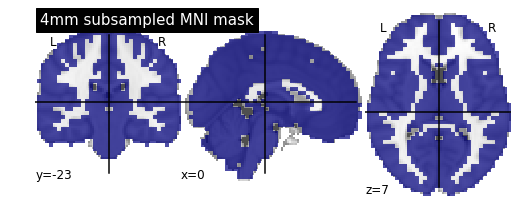

<class 'nibabel.nifti1.Nifti1Image'>
data shape (50, 59, 48, 1)
affine: 
[[   4.    0.    0.  -98.]
 [   0.    4.    0. -134.]
 [   0.    0.    4.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 4 50 59 48  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.  4.  4.  4.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : ali

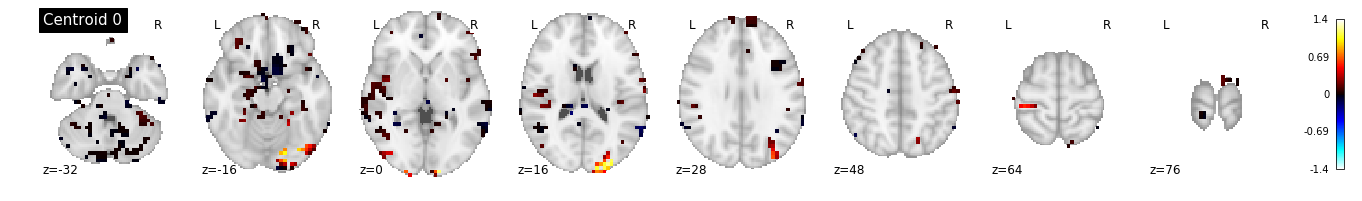

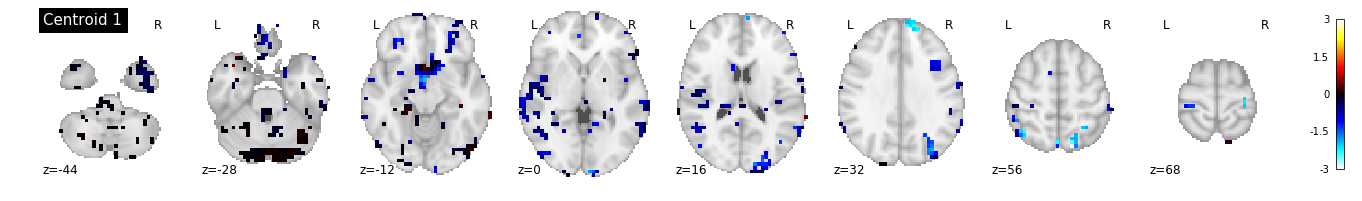

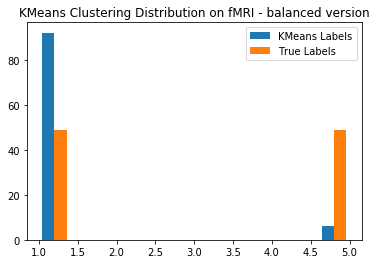

[1 1 1 5 5 5 5 5 1 1 5 5 1 5 5 5 1 5 1 1 1 1 5 1 5 1 1 5 1 1 1 1 1 1 1 5 5
 5 5 1 1 5 1 5 1 5 1 1 1 5 5 5 5 1 5 5 1 1 1 1 5 5 5 1 1 5 1 5 1 1 5 5 5 1
 1 5 5 5 5 1 5 1 5 5 1 5 1 5 5 1 5 5 1 1 1 5 1 5] [1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 5 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 5 1 1 1 1 1 1]
-0.000705846908692
0.00532235104196


In [100]:
## Test fMRI with balanced dataset 

%matplotlib inline 

from nilearn.image import threshold_img
from nilearn.plotting import plot_roi
from nilearn.datasets import fetch_icbm152_brain_gm_mask
from nilearn.image import resample_img
from sklearn.model_selection import permutation_test_score
import numpy as np
from sklearn import metrics

# Preparing mni mask at 4x4x4 

from matplotlib import pyplot as plt 

X= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['X']
y= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['y']

mni_mask = fetch_icbm152_brain_gm_mask()

target_affine_4mm = np.diag([4,4,4])

mni_mask_resampled = resample_img(mni_mask, target_affine_4mm)

# Values need to be thresholded 

from nilearn.image import threshold_img

mni_mask_resampled_thre = threshold_img(mni_mask_resampled,threshold=0.5)

plot_roi(mni_mask_resampled_thre,title='4mm subsampled MNI mask')
plt.show()

# Mask #

from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map

mymasker = NiftiMasker(mask_img=mni_mask_resampled_thre)
mymasker.fit()

## BEST VALUES ##

from sklearn.feature_selection import SelectKBest
y = selectFeatures(ArrayToList(y))
nbfeat = 2000 
y = np.array(y)
featureselect = SelectKBest(k=nbfeat)
redX = reduceX(X)

X_low = featureselect.fit_transform(redX,y)

## Fit with non-supervised algorithm KMeans) ##

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=20, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
statsPCA = pca.fit_transform(X_low)#This transformation is a compression of data

#Clusterization PCA - KMeans:
nbClust = 2
kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
   verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(statsPCA)
labels = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
plt.figure()
for i in range(nbClust):
    cluster_center_i = pca.inverse_transform(kmeans.cluster_centers_[i])
# Reproject the coefficients on the initial space with 23000+ voxels

    centeri_vox = featureselect.inverse_transform(cluster_center_i.reshape(1,2000))

# and now reproject in brain space for visualization 

    cluster_image_i = mymasker.inverse_transform(centeri_vox)
    print(cluster_image_i)
    plot_stat_map(cluster_image_i,cut_coords=8,display_mode='z',title='Centroid %d' % i)
    plt.savefig('brains_analysis_kmeans_%i.png' %i)
plt.show()

#########################################################################################################

labels2 = []
for i in range(len(labels)):
    if (labels[i] == 0):
        labels2.append(1)
    else :
        labels2.append(5)

plt.figure()
plt.hist([np.array(labels2),y], label=['KMeans Labels','True Labels'])
plt.title("KMeans Clustering Distribution on fMRI - balanced version")
plt.legend()
plt.savefig('KMeans_Clustering_histogramme_balanced.png')
plt.show()

#########################################################################################################
print(y,np.array(labels2))
print(metrics.adjusted_rand_score(labels_pred=labels, labels_true=y))
print(metrics.homogeneity_score(labels_pred=labels, labels_true=y))

**3) Compararaison avec le mode supervisé**

In [ ]:
%matplotlib inline
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(4, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)
def Digits_SVM(digits):
    # To apply a classifier on this data, we need to flatten the image, to
    # turn the data in a (samples, feature) matrix:
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))

    # Create a classifier: a support vector classifier
    classifier = svm.SVC(gamma=0.001)

    #Le paramètre gamma est choisi manuellement, mais il est recommandé de le configurer avec la "validation croisée".
    #La validation croisée permet de choisir la meilleure méthode et ses paramètres.

    #Le classificateur SVC est un classificateur binaire à la base (i.e. il ne peut classifier qu'entre 2 classes 
    #à la fois), son principe de résolution du problème passe par la construction d'un hyperplan qui permet de séparer
    #les deux classes.

    #Nous appelons notre exemple estimateur classifier, car il est un classificateur.
    #Il doit maintenant être monté sur le modèle, c'est-à-dire qu'il doit apprendre à partir du modèle.
    #Cela se fait en adoptant notre ensemble d’entraînement à la méthode fit.
    #Nous utiliserons la moitié de notre base de données pour cet entraînement.


    # We learn the digits on the first half of the digits
    classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

    # Now predict the value of the digit on the second half:
    expected = digits.target[n_samples // 2:]
    predicted = classifier.predict(data[n_samples // 2:])
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
    return expected, predicted

expected, predicted = Digits_SVM(digits)


plt.figure()
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:9]):
    plt.subplot(4, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Comparaison entre les différentes méthodes pour le data set Digits :

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

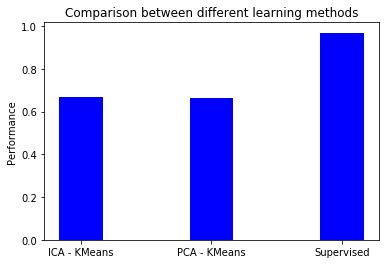

In [22]:
#Creation of bar graph : performance difference between supervised and non-supervised
%matplotlib inline

# Standard scientific Python imports

import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics

from sklearn import datasets, svm, metrics
import plotly.plotly as py

# The digits dataset
digits = datasets.load_digits()

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api
labelsICA = Digits_ICA_kmeans(15)[0]
labelsPCA = Digits_PCA_kmeans(15)[0]
expected, predicted = Digits_SVM(digits)

y = [metrics.adjusted_rand_score(digits.target, labelsICA)\
     ,metrics.adjusted_rand_score(digits.target, labelsPCA)\
     ,metrics.accuracy_score(expected, predicted)]

x = ['ICA - KMeans', 'PCA - KMeans', 'Supervised']
width = 1/3
plt.figure()
plt.title("Comparison between different learning methods")
plt.ylabel("Performance")
plt.bar(x, y, width, color="blue")
plt.savefig('hist.png')
plt.show()

